# **Goal**
-It is your job to predict if a passenger survived the sinking of the Titanic or not.

-For each in the test set, you must predict a 0 or 1 value for the variable.

-Model Selection 

-Voting

-How to find optimam Parameter

-used Automated machine learning 

-Report best model

# OverView

## **Data Dictionary**

**survival**:Survival	0 = No, 1 = Yes

**pclass**:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

**sex**:	Sex

**Age**:	Age in years

**sibsp**:	# of siblings / spouses aboard the Titanic

**parch**:	# of parents / children aboard the Titanic

**ticket**:	Ticket number

**fare**:	Passenger fare

**cabin**:	Cabin number

**embarked**:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton





## **Variable Notes**.

**pclass**: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

# import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train=pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Pre-processing

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isnull().sum()/train.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## handle Missing value

In [6]:
train["Age"]=train["Age"].fillna(method="backfill")


In [7]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
422,423,0,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,9.0,0,0,112052,0.0000,NaN,S
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C
514,515,0,3,"Coleff, Mr. Satio",male,24.0,0,0,349209,7.4958,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
650,651,0,3,"Mitkoff, Mr. Mito",male,18.0,0,0,349221,7.8958,NaN,S
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,34.0,0,0,343095,8.0500,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


In [8]:
train.isnull().sum()/train.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
train.duplicated().sum()

0

## Drop columns not need

In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
train=train.drop(columns="Name",axis=1)
train=train.drop(columns="Embarked",axis=1)
train=train.drop(columns="Cabin",axis=1)



In [12]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,female,38.0,1,0,PC 17599,71.2833
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,female,35.0,1,0,113803,53.1000
4,5,0,3,male,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000
887,888,1,1,female,19.0,0,0,112053,30.0000
888,889,0,3,female,26.0,1,2,W./C. 6607,23.4500
889,890,1,1,male,26.0,0,0,111369,30.0000


/tmp/ipykernel_23/4016136872.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr() , annot = True)


<Axes: >

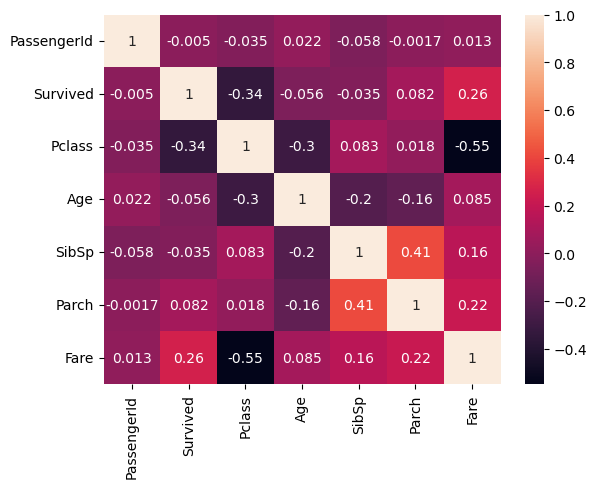

In [13]:
sns.heatmap(train.corr() , annot = True)

## Data Raito

<Axes: xlabel='Survived', ylabel='count'>

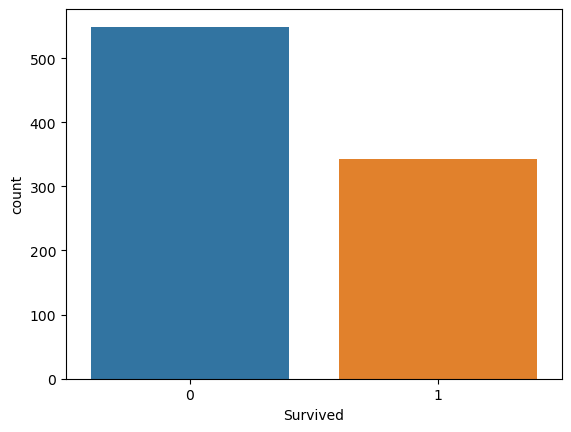

In [14]:
sns.countplot(x="Survived",data=train)

-Survived data is balanced

# Outliers

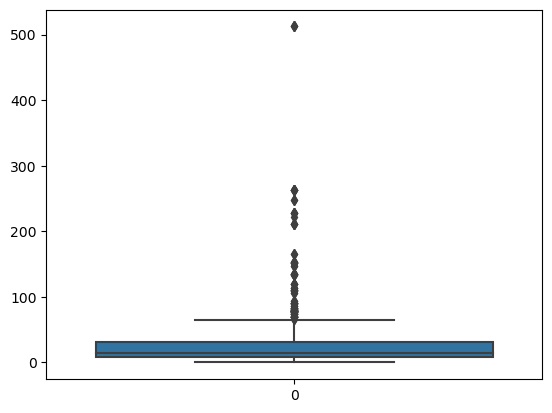

In [15]:
sns.boxplot(data = train["Fare"])
plt.show()

In [16]:
upper=train["Fare"].quantile(0.99)
lower=train["Fare"].quantile(0.01)

In [17]:
train=train[(train["Fare"]<upper) & (train["Fare"]>lower)]


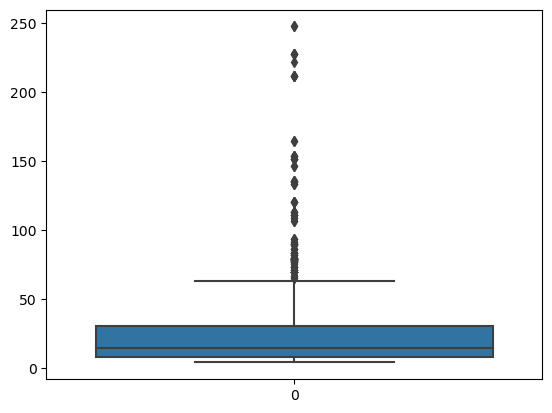

In [18]:
sns.boxplot(data = train["Fare"])
plt.show()

# Visualization & EDA

**Survived**

In [19]:
train.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           228
        0            81
male    0           452
        1           106
Name: Survived, dtype: int64

74% of females survive and 18% of male

<Axes: ylabel='Survived'>

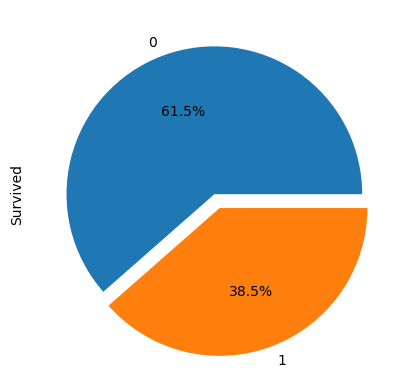

In [20]:
train['Survived'].value_counts().plot.pie(autopct="%1.1f%%",explode=[0,0.1])

Almost 62% people died in the horrible incident.

## Age

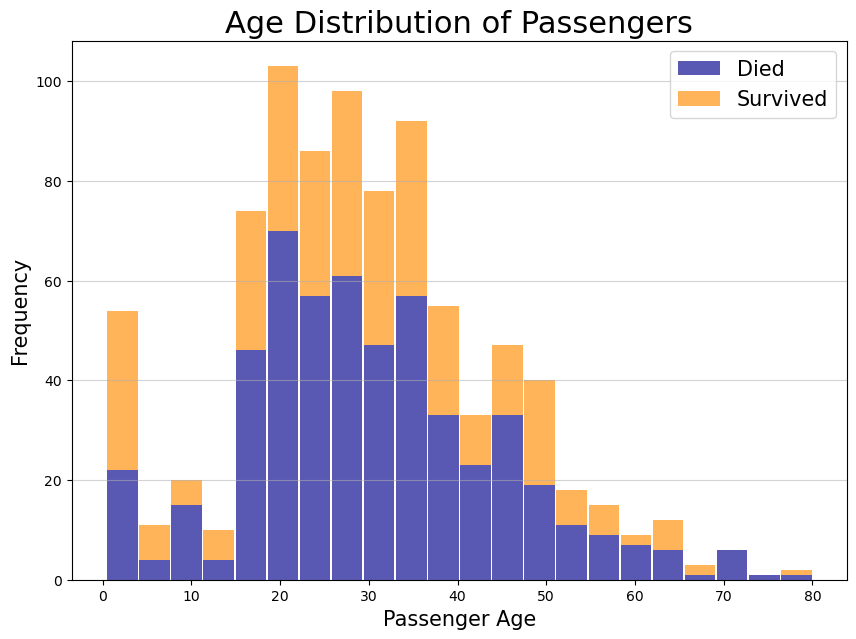

In [21]:
fig, ax = plt.subplots(figsize=(10,7))
age_died = train[train['Survived']==0]['Age']
age_survive = train[train['Survived']==1]['Age']
n, bins, patches = plt.hist(x = [age_died, age_survive],
                            stacked = True, bins='auto',
                            color=['darkblue', 'darkorange'],
                            alpha=0.65, rwidth=0.95)
plt.grid(axis='y', alpha=0.55)

plt.xlabel('Passenger Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Age Distribution of Passengers', fontsize = 22)
plt.legend(['Died','Survived'], fontsize = 15);

## **Fare**

<Axes: xlabel='Fare', ylabel='Density'>

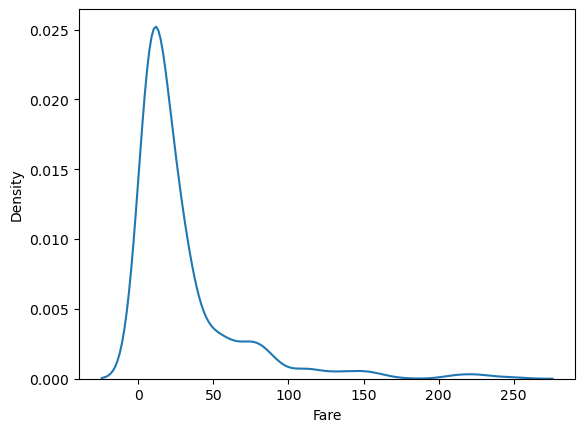

In [22]:
sns.kdeplot(train['Fare'])

## **Analysis on Numerical Columns ('Age','Fare')**

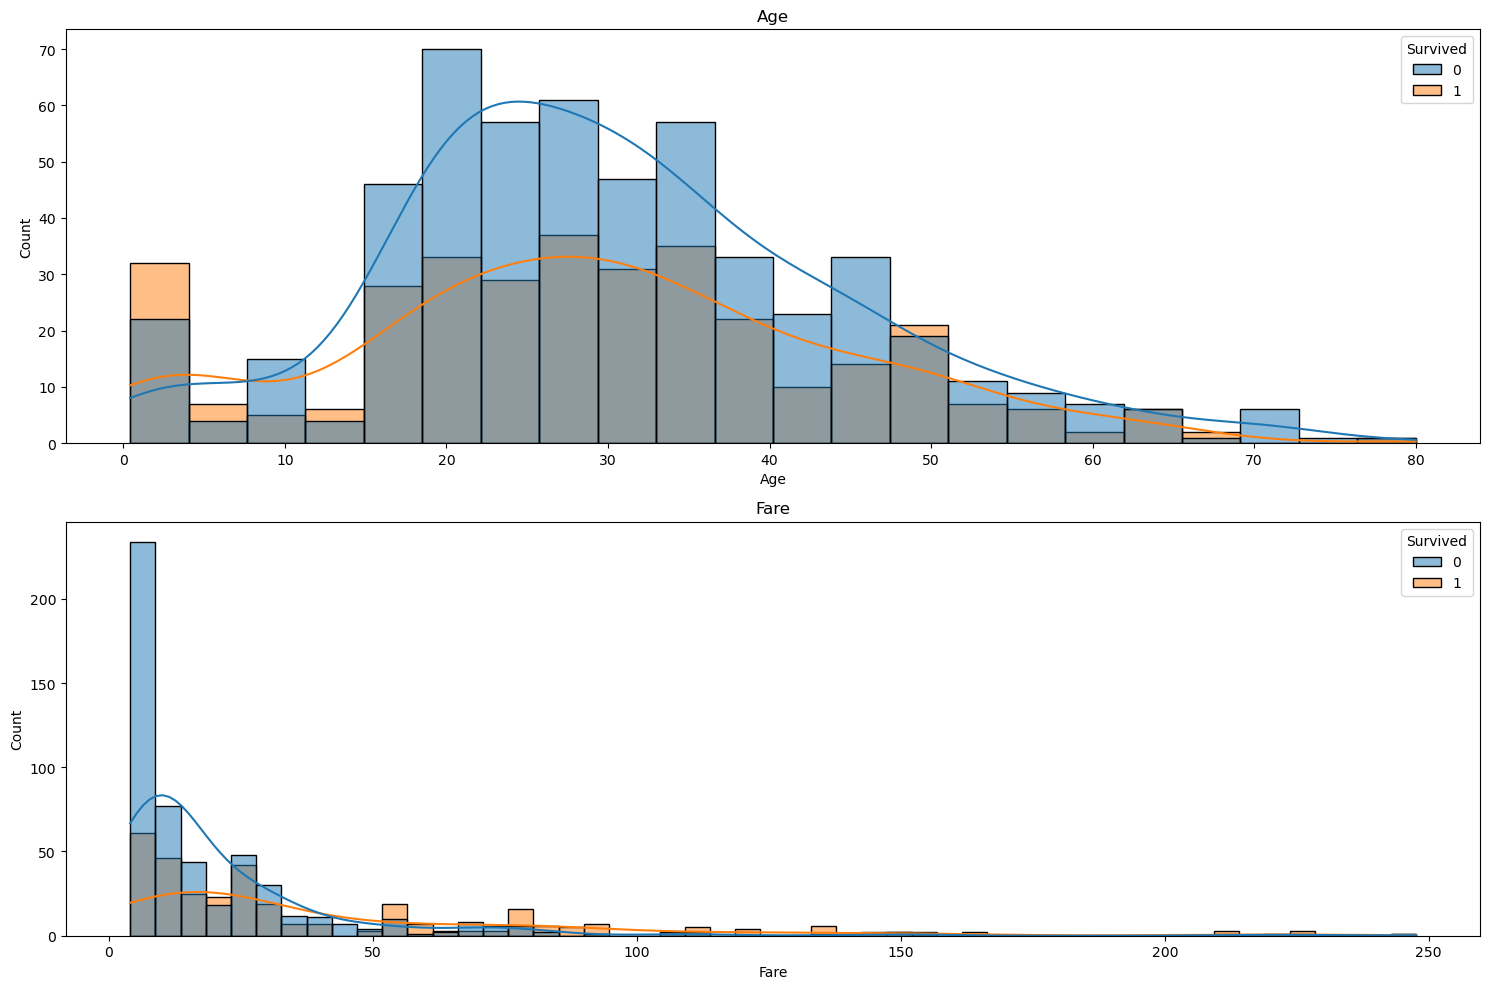

In [23]:
num_col = ['Age','Fare']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

for i, col in enumerate(num_col):
    sns.histplot(data=train, x=col,hue='Survived', ax=axes[i],kde=True)
    axes[i].set_title(col)

fig.tight_layout()
plt.show()

In [24]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,867.0,445.224913,257.817002,1.0000,220.500,446.0000,666.5000,891.0000
Survived,867.0,0.385236,0.486932,0.0000,0.000,0.0000,1.0000,1.0000
Pclass,867.0,2.328720,0.829114,1.0000,2.000,3.0000,3.0000,3.0000
Age,867.0,29.831223,14.603972,0.4200,21.000,29.0000,39.0000,80.0000
SibSp,867.0,0.521338,1.103404,0.0000,0.000,0.0000,1.0000,8.0000
Parch,867.0,0.374856,0.796334,0.0000,0.000,0.0000,0.0000,6.0000
Fare,867.0,29.504281,36.683183,4.0125,7.925,14.4583,30.6958,247.5208


-> 38 percent people are survived.

-> The average age of the person in the ship was 29 years. Minimum age 0.42 years and maximum age 80 years

-> The maximum Fare amount is 512 dollars and The minimum Fare amount is 0 because some people might have got free ride.

-> some were travelling alone while some were travelling along with large family

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


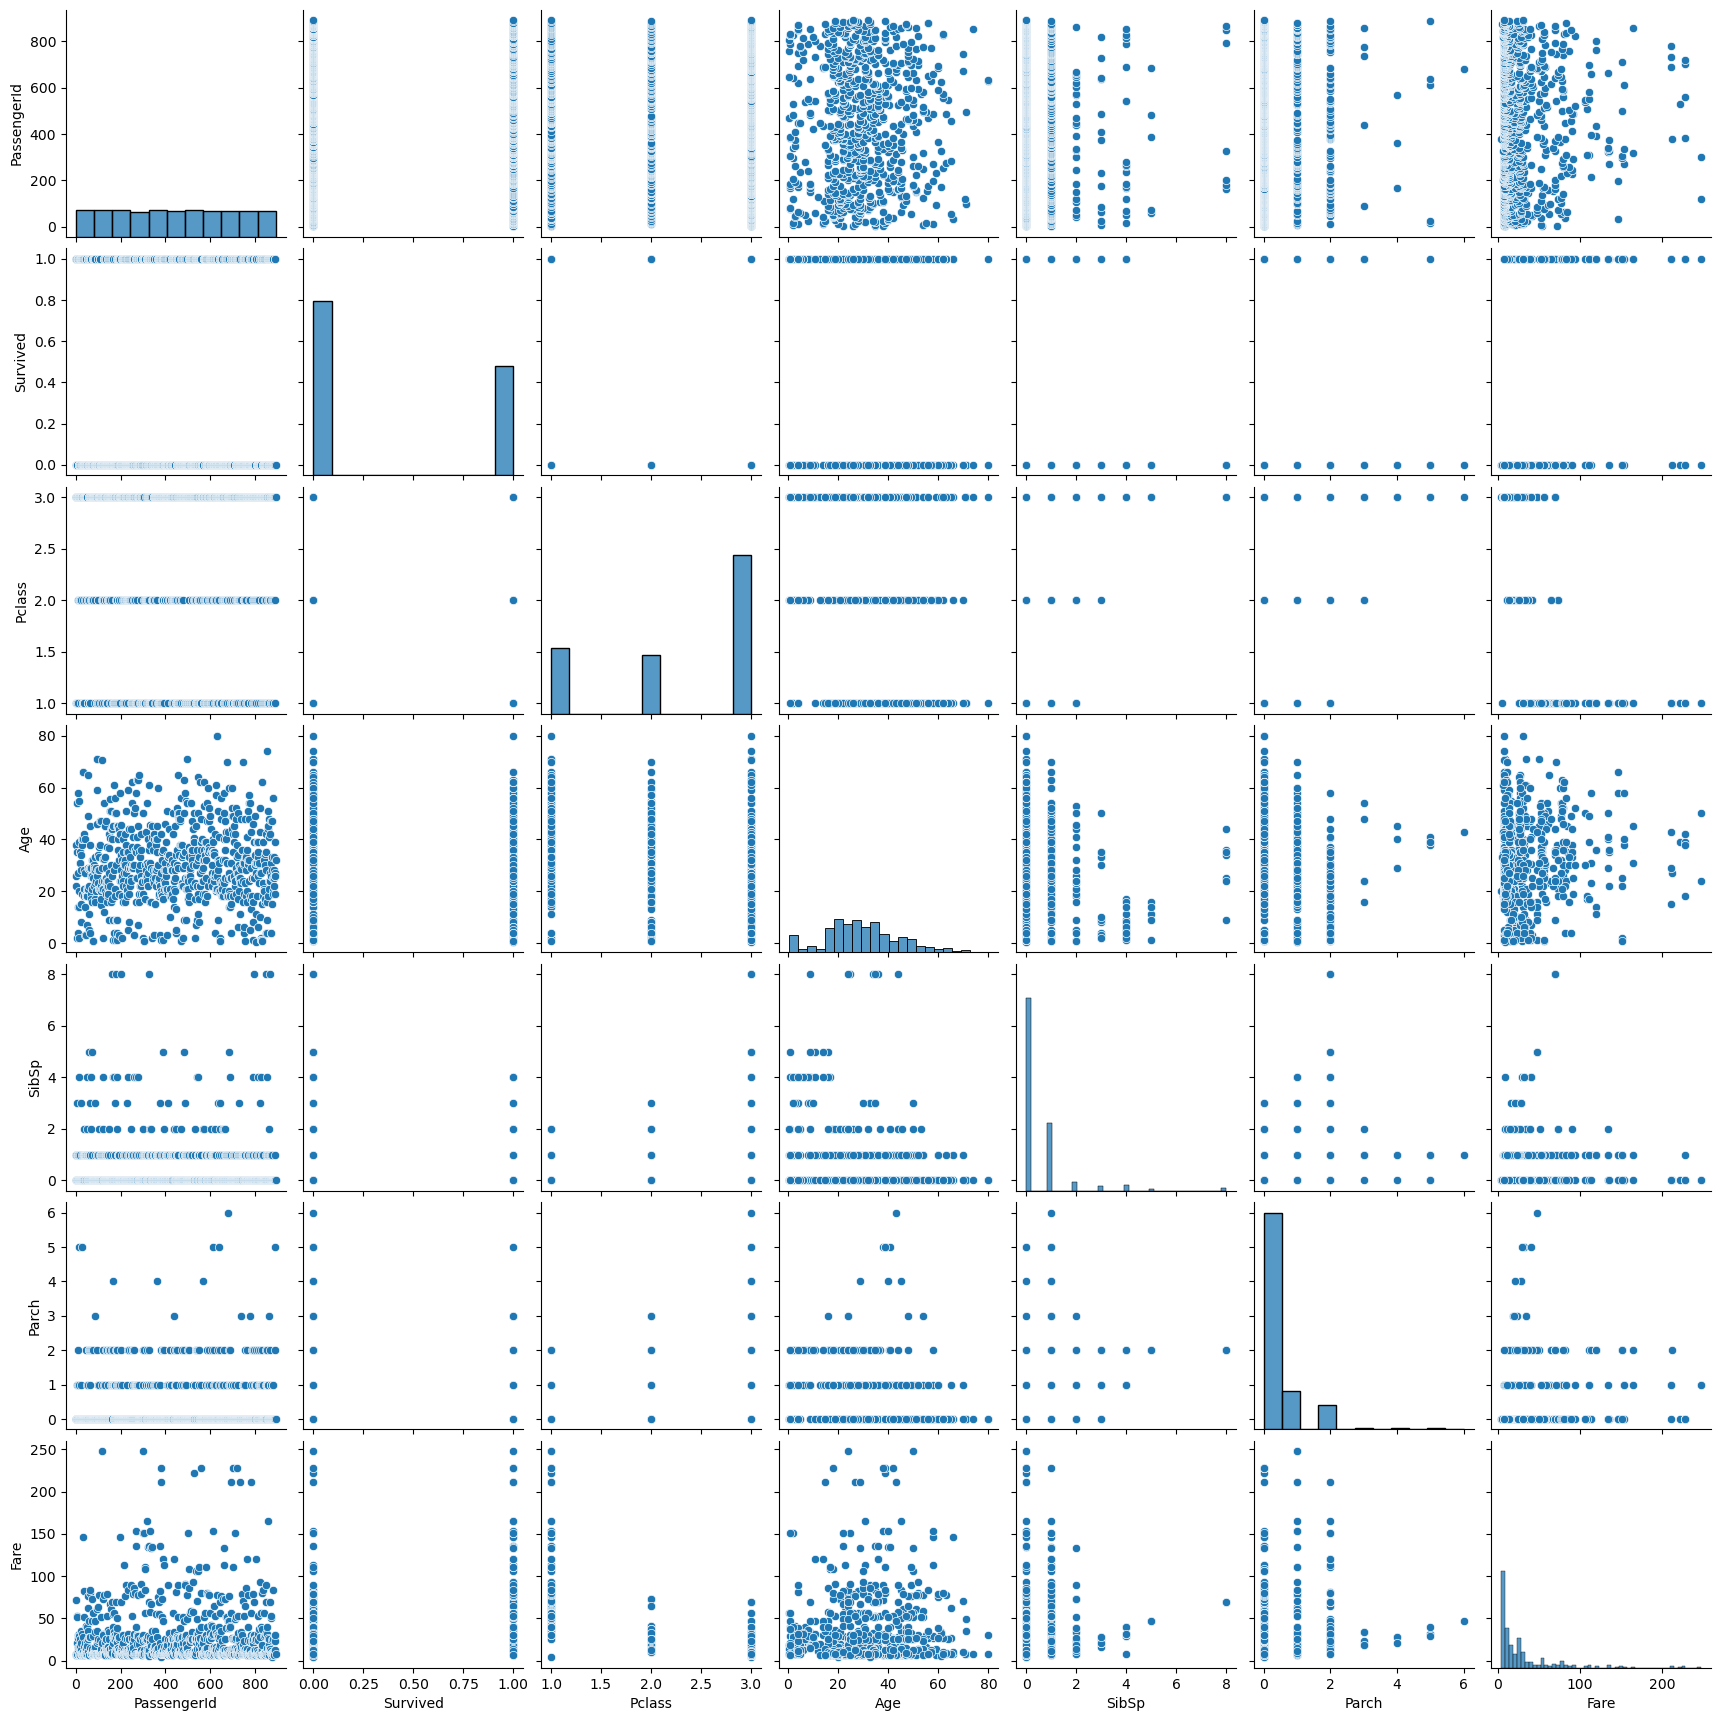

In [25]:
sns.pairplot(train)

data non linear, best model is used DecisionTrees , RandomForest, XGBoost and ensemple

## Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    train[column] = label_encoder.fit_transform(train[column])

/tmp/ipykernel_23/2746625958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[column] = label_encoder.fit_transform(train[column])
/tmp/ipykernel_23/2746625958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[column] = label_encoder.fit_transform(train[column])


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 867 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  867 non-null    int64  
 1   Survived     867 non-null    int64  
 2   Pclass       867 non-null    int64  
 3   Sex          867 non-null    int64  
 4   Age          867 non-null    float64
 5   SibSp        867 non-null    int64  
 6   Parch        867 non-null    int64  
 7   Ticket       867 non-null    int64  
 8   Fare         867 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 100.0 KB


# Training ML Model

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report


## Split Data

In [30]:
from sklearn.model_selection import train_test_split


In [31]:
x=train.drop(labels="Survived",axis=1)
y=train["Survived"]

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size= 0.25 , random_state= 42)

## Data scaling with standerdscaler

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc=StandardScaler()

In [35]:
x_train_scaler=sc.fit_transform(x_train)

In [36]:
x_test_scaler=sc.fit_transform(x_test)

# **KNN**

In [37]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [38]:
print(knn.score(x_train_scaler,y_train))
print(knn.score(x_test_scaler,y_test))

0.3861538461538462
0.39631336405529954


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [39]:
y_pred_knn=knn.predict(x_test_scaler)
print("acuuricy score: ", accuracy_score(y_pred_knn,y_test))
print(confusion_matrix(y_pred_knn,y_test))

acuuricy score:  0.39631336405529954
[[ 39  31]
 [100  47]]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# **Logistic Regression**

In [40]:
Lr=LogisticRegression(C=0.1)

In [41]:
Lr.fit(x_train_scaler,y_train)

LogisticRegression(C=0.1)

In [42]:
y_pred_1=Lr.predict(x_test_scaler)
y_pred_1

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [43]:
print(Lr.score(x_train_scaler,y_train))
print(Lr.score(x_test_scaler,y_test))

0.7938461538461539
0.8064516129032258


In [44]:
print("acuuricy score: ", accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))

acuuricy score:  0.8064516129032258
[[119  22]
 [ 20  56]]


# **Decision Tree**

In [45]:
dt=DecisionTreeClassifier(max_depth=5,max_features=7)
dt.fit(x_train, y_train)
prediction4=dt.predict(x_test)
print('The accuracy of the Decision Tree is',accuracy_score(prediction4,y_test))

The accuracy of the Decision Tree is 0.8202764976958525


              precision    recall  f1-score   support

           0       0.85      0.88      0.86       139
           1       0.77      0.72      0.74        78

    accuracy                           0.82       217
   macro avg       0.81      0.80      0.80       217
weighted avg       0.82      0.82      0.82       217



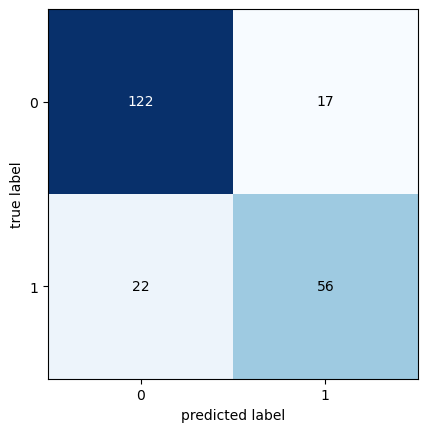

In [46]:
con = confusion_matrix(y_test , prediction4 )
con
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(con )
print (classification_report(y_test , prediction4))

# **Random Forest**

### **How to find optimam Parameter**

## Grid Search

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
# parameter
param_grid={"n_estimators":np.arange(10,20),"max_depth":[4,5,6],'max_features':[8,7,9]}
model=RandomForestClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)
grid_res=grid.fit(x_train_scaler,y_train)
print ("Best: %f using %s" %(grid_res.best_score_ , grid_res.best_params_))

Best: 0.829231 using {'max_depth': 5, 'max_features': 8, 'n_estimators': 14}


In [49]:
rf = RandomForestClassifier(n_estimators= 18 , max_depth= 5 , max_features= 7)

In [50]:
rf.fit(x_train_scaler, y_train)

RandomForestClassifier(max_depth=5, max_features=7, n_estimators=18)

In [51]:
print (rf.score(x_train_scaler, y_train))
print (rf.score(x_test_scaler, y_test))


0.8876923076923077
0.8202764976958525


In [52]:
y_pred_rf=rf.predict(x_test_scaler)
print("acuuricy score: ", accuracy_score(y_pred_rf,y_test))
print(confusion_matrix(y_pred_rf,y_test))

acuuricy score:  0.8202764976958525
[[121  21]
 [ 18  57]]


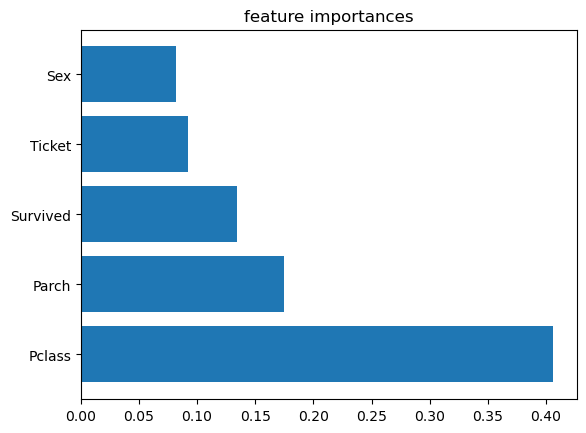

In [53]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin']

f_importances(abs(rf.feature_importances_), features_names, top=5)


# **XGboost**

In [54]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [55]:
from xgboost import XGBClassifier

xgb=XGBClassifier(missing=10 , max_depth=6,  n_estimators=9,learning_rate=0.3)


In [56]:
# parameter
param_grid={"missing":np.arange(10,20),"max_depth":[4,5,6],'n_estimators':[8,7,9],"learning_rate":[0.1,0.2,0.3,0.4]}
model=RandomForestClassifier()
grid=GridSearchCV(estimator=xgb,param_grid=param_grid,cv=5)
grid_res=grid.fit(x_train_scaler,y_train)
print ("Best: %f using %s" %(grid_res.best_score_ , grid_res.best_params_))




Best: 0.838462 using {'learning_rate': 0.3, 'max_depth': 6, 'missing': 10, 'n_estimators': 9}


In [57]:
xgb.fit(x_train_scaler,y_train)
print (xgb.score(x_train_scaler, y_train))
print (xgb.score(x_test_scaler, y_test))

0.94
0.8202764976958525


In [58]:
y_pred_xgb=xgb.predict(x_test_scaler)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       139
           1       0.76      0.73      0.75        78

    accuracy                           0.82       217
   macro avg       0.81      0.80      0.80       217
weighted avg       0.82      0.82      0.82       217



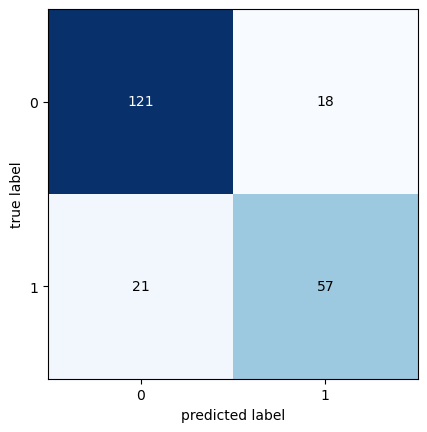

In [59]:
con = confusion_matrix(y_test , xgb.predict(x_test_scaler) )
con
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(con )

print (classification_report(y_test , xgb.predict(x_test_scaler)))

In [60]:
print("acuuricy score: ", accuracy_score(y_pred_xgb,y_test))
print(confusion_matrix(y_pred_xgb,y_test))

acuuricy score:  0.8202764976958525
[[121  21]
 [ 18  57]]


**Out of five Models XGBoost Model gives highest**

# **Voting**

In [61]:
clf1=LogisticRegression()
clf2=XGBClassifier(missing=10 , max_depth=4,  n_estimators=6,learning_rate=0.4)
clf3= DecisionTreeClassifier(    max_depth= 3 , max_features= 4)
clf4=KNeighborsClassifier(n_neighbors=10)
clf5=RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features= 3)

In [62]:
v_clf=VotingClassifier(estimators=[('LR',clf1),('xgb',clf2),('DT',clf3),('knn',clf4),('rf',clf5)],voting ="hard")

In [63]:
v_clf.fit(x_train_scaler , y_train)
print (v_clf.score(x_train_scaler, y_train))
print (v_clf.score(x_test_scaler, y_test))

0.84
0.8294930875576036


## Cross Validation

In [64]:
from sklearn.model_selection import KFold , cross_val_score

In [65]:
K_fold = KFold(n_splits= 3 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(xgb ,x_train_scaler, y_train, cv = K_fold , scoring= scoring)
print (score)

[0.82488479 0.8156682  0.78240741]


## **Auto ML**
this code is runnig in **colab**

In [66]:
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.3/295.3 kB 6.4 MB/s eta 0:00:00


In [67]:
# from flaml import AutoML

# target = "Survived"

# # Split data into training and testing sets
# train, test = train.iloc[:int(0.8*len(train))], train.iloc[int(0.8*len(train)):]

# automl = AutoML()

# # Specify the metric to optimize
# automl_settings = {
#     "time_budget": 60,  # in seconds
#     "metric": 'accuracy',
#     "task": 'classification',
#     "log_file_name": 'titanic.log',
# }

# # Convert target variable to a pandas series
# y_train = train[target]
# X_train = train.drop(columns=[target])

# # automl.fit(X_train, y_train, **automl_settings)

# # print(f"Best model: {automl.best_estimator}")
# # print(f"Best accuracy: {1-automl.best_loss}")

# **Report**

In [68]:
# XGB
cr = classification_report(y_test, y_pred_xgb)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       139
           1       0.76      0.73      0.75        78

    accuracy                           0.82       217
   macro avg       0.81      0.80      0.80       217
weighted avg       0.82      0.82      0.82       217



In [69]:
# rf
cr = classification_report(y_test, y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       139
           1       0.76      0.73      0.75        78

    accuracy                           0.82       217
   macro avg       0.81      0.80      0.80       217
weighted avg       0.82      0.82      0.82       217



In [70]:
# Logistic Regression
cr = classification_report(y_test, y_pred_1)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       139
           1       0.74      0.72      0.73        78

    accuracy                           0.81       217
   macro avg       0.79      0.79      0.79       217
weighted avg       0.81      0.81      0.81       217



# Final_Accurcy

In [71]:
final_acc=pd.DataFrame({"Modle":["KNN","LR","DT","RF","XGB"],"ACC":[accuracy_score(y_pred_knn,y_test), accuracy_score(y_pred_1,y_test),accuracy_score(prediction4,y_test), accuracy_score(y_pred_rf,y_test),accuracy_score(y_pred_xgb,y_test)]})

In [72]:
print(final_acc)

  Modle       ACC
0   KNN  0.396313
1    LR  0.806452
2    DT  0.820276
3    RF  0.820276
4   XGB  0.820276


**XGB and RF is best report accuracy 82% and autoML the same on**

# Testing 

In [73]:
print(x.head(10))
print("************************************************************************")
print(y.head(10))

   PassengerId  Pclass  Sex   Age  SibSp  Parch  Ticket     Fare
0            1       3    1  22.0      1      0     513   7.2500
1            2       1    0  38.0      1      0     585  71.2833
2            3       3    0  26.0      0      0     656   7.9250
3            4       1    0  35.0      1      0      45  53.1000
4            5       3    1  35.0      0      0     462   8.0500
5            6       3    1  54.0      0      0     265   8.4583
6            7       1    1  54.0      0      0      81  51.8625
7            8       3    1   2.0      3      1     385  21.0750
8            9       3    0  27.0      0      2     334  11.1333
9           10       2    0  14.0      1      0     126  30.0708
************************************************************************
0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64


In [74]:
surv_1 = [1,3,1,22,1 ,0 ,523,7.25] # 0
print (dt.predict([surv_1]))


surv_4 = [ 2,1,0,38.0,1,0,596,71.2833] # 1
print (dt.predict([surv_4]))

surv_3 = [10,2,0,14.0,1,0,132,30.0708] # 9
print (dt.predict([surv_3]))


[0]
[1]
[1]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
